load needed packages

In [4]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model as linear_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

 import data and preconditioning

In [5]:
data_path = 'E:/Research/CE/TeenDriverCrashData.xlsx'
original_data = pd.read_excel(data_path)
original_data.columns = original_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
original_data = original_data[original_data.crash_severity != '99 - UNKNOWN']
original_data.columns #display column titles

Index(['month', 'crash_id', 'crash_severity', 'crash_time', 'day_of_week',
       'first_harmful_event', 'intersection_related', 'latitude',
       'light_condition', 'longitude', 'manner_of_collision', 'object_struck',
       'roadway_part', 'roadway_type', 'rural_flag', 'rural_urban_type',
       'surface_condition', 'traffic_control_type', 'weather_condition',
       'contributing_factor_1', 'vehicle_body_style',
       'vehicle_travel_direction', 'person_age', 'person_ethnicity',
       'person_gender', 'person_type', 'criteria'],
      dtype='object')

In [6]:
original_data[original_data.crash_severity != '99 - UNKNOWN']
original_data.sample(5) #display first 5 lines of table

,month,crash_id,crash_severity,crash_time,day_of_week,first_harmful_event,intersection_related,latitude,light_condition,longitude,...,traffic_control_type,weather_condition,contributing_factor_1,vehicle_body_style,vehicle_travel_direction,person_age,person_ethnicity,person_gender,person_type,criteria
4048,Mar,13172908,N - NOT INJURED,1704,Friday,Motor Vehicle In Transport,Intersection Related,No Data,Daylight,No Data,...,None,Clear,Turned Improperly - Wide Right,"Passenger Car, 2-Door",South,19,White,Female,Driver,1
1029,Nov,15446064,N - NOT INJURED,1738,Saturday,Fixed Object,Non Intersection,32.3932,"Dark, Not Lighted",-99.3533,...,Center Stripe/Divider,Cloudy,Other (Explain In Narrative),Pickup,West,18,White,Male,Driver,1
1778,Jan,14237556,C - POSSIBLE INJURY,1656,Wednesday,Motor Vehicle In Transport,Intersection Related,33.4892,Daylight,-102.009,...,Center Stripe/Divider,Rain,Unsafe Speed,Sport Utility Vehicle,North,17,White,Female,Driver,1
3922,Jan,12627390,N - NOT INJURED,1330,Monday,Parked Car,Non Intersection,32.0253,Daylight,-101.992,...,Center Stripe/Divider,Snow,Driver Inattention,Truck,West,20,Hispanic,Male,Driver,1
14,May,12187263,N - NOT INJURED,1245,Monday,Parked Car,Non Intersection,32.2105,Daylight,-99.7989,...,None,Clear,Distraction In Vehicle,Pickup,North,17,White,Female,Driver,1


In [7]:
#all condidered features, removed crash ID, rural flag, rual urban type, object struck. Surface condition will be removed later.
#remove crash ID and rural flag since they are not related to crash severity by nature. 
#remove rural urban type and object struck due to the large percentile of no data in the columns
crash_features = ['crash_severity','month', 'crash_time', 'day_of_week',
       'first_harmful_event', 'intersection_related', 'latitude',
       'light_condition', 'longitude', 'manner_of_collision', 
       'roadway_part',   'surface_condition', 'traffic_control_type', 'weather_condition',
       'contributing_factor_1', 'vehicle_body_style',
       'vehicle_travel_direction', 'person_age', 'person_ethnicity',
       'person_gender'] 

X = original_data[crash_features]
X.head() #display top few rows 

,crash_severity,month,crash_time,day_of_week,first_harmful_event,intersection_related,latitude,light_condition,longitude,manner_of_collision,roadway_part,surface_condition,traffic_control_type,weather_condition,contributing_factor_1,vehicle_body_style,vehicle_travel_direction,person_age,person_ethnicity,person_gender
0,N - NOT INJURED,Jan,1100,Wednesday,Fixed Object,Non Intersection,32.3728,Daylight,-99.7915,One Motor Vehicle - Going Straight,Main/Proper Lane,Dry,Center Stripe/Divider,Clear,Driver Inattention,"Passenger Car, 4-Door",East,19,White,Male
1,N - NOT INJURED,Jan,750,Friday,Motor Vehicle In Transport,Intersection,No Data,Dawn,No Data,Opposite Direction - One Straight-One Left Turn,Main/Proper Lane,Dry,Marked Lanes,Cloudy,No Data,Pickup,North,18,White,Male
2,N - NOT INJURED,Feb,2158,Monday,Motor Vehicle In Transport,Non Intersection,32.5046,"Dark, Not Lighted",-99.971,Same Direction - Both Going Straight-Rear End,Main/Proper Lane,Dry,None,Clear,Failed To Control Speed,Sport Utility Vehicle,North,17,White,Male
3,N - NOT INJURED,Mar,1505,Thursday,Fixed Object,Non Intersection,No Data,Daylight,No Data,One Motor Vehicle - Going Straight,Main/Proper Lane,Dry,Center Stripe/Divider,Clear,Distraction In Vehicle,"Passenger Car, 4-Door",East,17,White,Female
4,B - NON-INCAPACITATING INJURY,Mar,2200,Saturday,Fixed Object,Non Intersection,32.1802,"Dark, Not Lighted",-99.7689,One Motor Vehicle - Going Straight,Main/Proper Lane,Dry,None,Clear,Other (Explain In Narrative),"Passenger Car, 2-Door",South,17,White,Male


In [8]:
print(X.info()) #general information about the columns
#int64: integer, object: mixture of all datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4748 entries, 0 to 4766
Data columns (total 20 columns):
crash_severity              4748 non-null object
month                       4748 non-null object
crash_time                  4748 non-null int64
day_of_week                 4748 non-null object
first_harmful_event         4748 non-null object
intersection_related        4748 non-null object
latitude                    4748 non-null object
light_condition             4748 non-null object
longitude                   4748 non-null object
manner_of_collision         4748 non-null object
roadway_part                4748 non-null object
surface_condition           4748 non-null object
traffic_control_type        4748 non-null object
weather_condition           4748 non-null object
contributing_factor_1       4748 non-null object
vehicle_body_style          4748 non-null object
vehicle_travel_direction    4748 non-null object
person_age                  4748 non-null int64
person_ethnic

In [9]:
#detailed information about the columns
def summerize_data(df):
    for column in df.columns:
        print(column)
        if df.dtypes[column] == np.object: # Categorical data
            print(df[column].value_counts())
        else:
            print(df[column].describe()) 
            
        print('\n')
    
summerize_data(X)

crash_severity
N - NOT INJURED                  3145
B - NON-INCAPACITATING INJURY     765
C - POSSIBLE INJURY               588
A - SUSPECTED SERIOUS INJURY      189
K - KILLED                         61
Name: crash_severity, dtype: int64


month
Oct    480
May    474
Mar    409
Nov    403
Dec    403
Sep    401
Apr    397
Aug    365
Jun    364
Jan    353
Feb    348
Jul    336
oct     15
Name: month, dtype: int64


crash_time
count    4748.000000
mean     1377.661331
std       581.950813
min         0.000000
25%       855.000000
50%      1515.000000
75%      1815.000000
max      2358.000000
Name: crash_time, dtype: float64


day_of_week
Friday       848
Wednesday    704
Thursday     694
Tuesday      681
Monday       619
Saturday     609
Sunday       593
Name: day_of_week, dtype: int64


first_harmful_event
Motor Vehicle In Transport    3014
Fixed Object                  1059
Overturned                     473
Animal                          65
Parked Car                      54
Other O

Male       2994
Female     1737
Unknown      17
Name: person_gender, dtype: int64




The following is using Label Encoder to encode categorical data. 
One problem of label encoder is that it can only encode data into numbers. For example, it can possibly encode "month_july" into 7 and "month_august" into 8. In this case, August weighs heavier than July, but in fact it may not be that much a difference. 

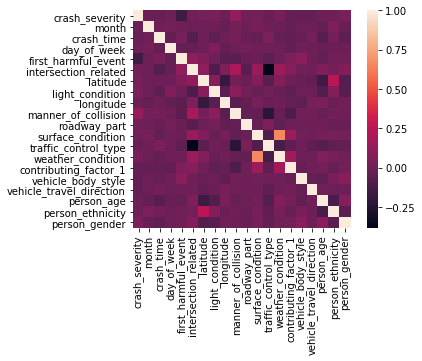

,crash_severity,month,crash_time,day_of_week,first_harmful_event,intersection_related,latitude,light_condition,longitude,manner_of_collision,roadway_part,surface_condition,traffic_control_type,weather_condition,contributing_factor_1,vehicle_body_style,vehicle_travel_direction,person_age,person_ethnicity,person_gender
4762,4,2,1538,6,2,2,1468,4,1428,31,3,7,13,5,16,7,2,20,3,1
4763,4,2,1053,4,2,1,1377,4,1299,19,3,0,0,1,45,6,2,20,7,1
4764,1,2,1951,4,2,3,1134,0,317,25,3,0,5,1,45,3,6,18,7,0
4765,4,2,805,0,1,3,1393,4,1303,10,3,0,5,1,35,5,6,16,5,0
4766,4,2,1850,0,2,3,1825,4,1728,25,3,0,5,1,16,4,5,19,3,1


In [10]:
# Encode the categorical features as numbers with LabelEncoder
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column].astype(str))
    return result, encoders


# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(X)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

encoded_data.tail(5)
#Note: look at darkest spot for the most negative correlation, brightest spot for the most positive correlation

notable positive correlation: weather_condition & surface_condition,
                              object_struck & first_harmful_event.
        negative correlation:                             traffic_control_type & intersection_related.

In [11]:
#explore strong correlation between "weather_condition" and "surface_condition" revealed by heatmap
X[["weather_condition", "surface_condition"]].head(10)

,weather_condition,surface_condition
0,Clear,Dry
1,Cloudy,Dry
2,Clear,Dry
3,Clear,Dry
4,Clear,Dry
5,Clear,Dry
6,Clear,Dry
7,Clear,Dry
8,Rain,Wet
9,Clear,Dry


In [12]:
#"weather_condition" also indicates "surface_condition", delete "surface_condition"
X.drop('surface_condition', axis = 1, inplace = True)
#check if deleted
X.head(1)

C:\Users\amand\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,crash_severity,month,crash_time,day_of_week,first_harmful_event,intersection_related,latitude,light_condition,longitude,manner_of_collision,roadway_part,traffic_control_type,weather_condition,contributing_factor_1,vehicle_body_style,vehicle_travel_direction,person_age,person_ethnicity,person_gender
0,N - NOT INJURED,Jan,1100,Wednesday,Fixed Object,Non Intersection,32.3728,Daylight,-99.7915,One Motor Vehicle - Going Straight,Main/Proper Lane,Center Stripe/Divider,Clear,Driver Inattention,"Passenger Car, 4-Door",East,19,White,Male


In [13]:
#check the negative correlation between traffic_control_type & intersection_related
X[["traffic_control_type", "intersection_related"]].head(10)

,traffic_control_type,intersection_related
0,Center Stripe/Divider,Non Intersection
1,Marked Lanes,Intersection
2,None,Non Intersection
3,Center Stripe/Divider,Non Intersection
4,None,Non Intersection
5,Center Stripe/Divider,Non Intersection
6,Center Stripe/Divider,Non Intersection
7,Center Stripe/Divider,Driveway Access
8,Stop Sign,Intersection Related
9,Center Stripe/Divider,Driveway Access


In [14]:

encoded_data, encoders = number_encode_features(X)
target = encoded_data["crash_severity"]

randomly split the data set to two: training set used to train models, and testing set used to test the model

In [15]:
from sklearn.model_selection import train_test_split
# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(encoded_data[encoded_data.columns.drop("crash_severity")], target, train_size=0.70)
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

C:\Users\amand\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\amand\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\amand\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\amand\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  import sys


In [16]:
# logistic regression
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

C:\Users\amand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [17]:
print(accuracy_score(y_test, y_pred)) #test the model with test set

0.6743859649122808


In [18]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae


print(fit_and_evaluate(cls))

0.8764912280701754


C:\Users\amand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [19]:

# Try random forest method
random_forest = RandomForestRegressor(random_state=60)
print(fit_and_evaluate(random_forest))

C:\Users\amand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.124491228070177


The random forest error evaluation is above 1, which is not ideal. This can be improved by using more samples to refurnish the model or try out other models. 

Index(['month', 'crash_time', 'day_of_week', 'first_harmful_event',
       'intersection_related', 'latitude', 'light_condition', 'longitude',
       'manner_of_collision', 'roadway_part', 'traffic_control_type',
       'weather_condition', 'contributing_factor_1', 'vehicle_body_style',
       'vehicle_travel_direction', 'person_age', 'person_ethnicity',
       'person_gender'],
      dtype='object')


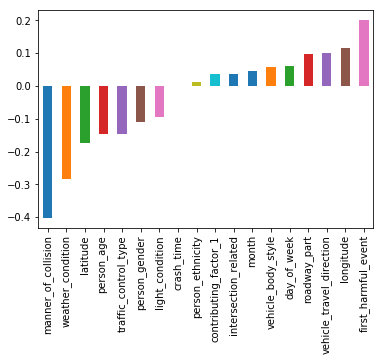

first_harmful_event         0.199954
longitude                   0.115781
vehicle_travel_direction    0.101860
roadway_part                0.098911
day_of_week                 0.059559
vehicle_body_style          0.057146
month                       0.044379
intersection_related        0.036056
contributing_factor_1       0.034939
person_ethnicity            0.013115
crash_time                 -0.000691
light_condition            -0.096194
person_gender              -0.110734
traffic_control_type       -0.147426
person_age                 -0.148034
latitude                   -0.174136
weather_condition          -0.283717
manner_of_collision        -0.402753
dtype: float64


In [20]:

coefs = pd.Series(cls.coef_[0], index=X_train.columns)
print(X_train.columns)
coefs = coefs.sort_values()
plt.subplot(1,1,1)
coefs.plot(kind="bar")
plt.show()
print(coefs.sort_values(ascending = False))

Following is another method, which I combined Label Encoder and One Hot Encoder. 
I used Label Encoder for crash_severity since it is a feature that can be labeled by 1,2,3 etc by nature. 
In this case it seems like one hot encoder is more accurate compared to Label Encoder from above (lower mae). But there are still some cons:
1. one hot encoder takes too much memory/time, which might be an issue.
2. one hot encoder takes every single option in each column and make a new column with that name. Then compare all options from all columns together. i.e. person_ethnicity_Black is considered to be the one with the most positive correlation compared with all other options from different columns such as contributing_factor_1_Faulty Evasive Action. I am still trying to figure out how to handle this issue. 

In [21]:
# Encode crash_severity with Label Encoder
# Encode the other categorical features as numbers with One Hot Encoder

features = X.copy() #make a copy

#divide columns into numerical/categorical
numerical_subset = X.select_dtypes('int64')
categorical_subset = X.select_dtypes('object')

#label encode crash_severity
label_encoder = preprocessing.LabelEncoder()
target = label_encoder.fit_transform(features['crash_severity'])

#one hot encode categorical columns
categorical_subset = pd.get_dummies(categorical_subset[categorical_subset.columns.drop("crash_severity")])

#join two dataframes
features = pd.concat([numerical_subset, categorical_subset], axis = 1)
print(features.head())

   crash_time  person_age  month_Apr  month_Aug  month_Dec  month_Feb  \
0        1100          19          0          0          0          0   
1         750          18          0          0          0          0   
2        2158          17          0          0          0          1   
3        1505          17          0          0          0          0   
4        2200          17          0          0          0          0   

   month_Jan  month_Jul  month_Jun  month_Mar          ...            \
0          1          0          0          0          ...             
1          1          0          0          0          ...             
2          0          0          0          0          ...             
3          0          0          0          1          ...             
4          0          0          0          1          ...             

   person_ethnicity_Asian  person_ethnicity_Black  person_ethnicity_Hispanic  \
0                       0                       

In [22]:
# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.70)
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

C:\Users\amand\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\amand\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\amand\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\amand\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [23]:

cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
print(accuracy_score(y_test, y_pred))

C:\Users\amand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5684210526315789


In [24]:
print(fit_and_evaluate(cls))

C:\Users\amand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


1.063859649122807


In [25]:
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
print(coefs.sort_values(ascending = False))

person_ethnicity_Black                                                 0.742524
contributing_factor_1_Faulty Evasive Action                            0.568886
contributing_factor_1_Failed To Yield Right Of Way - Stop Sign         0.510389
vehicle_body_style_Sport Utility Vehicle                               0.505298
manner_of_collision_Opposite Direction - One Straight-One Left Turn    0.500745
month_Aug                                                              0.460839
contributing_factor_1_Disregard Stop Sign Or Light                     0.446037
contributing_factor_1_Failed To Yield Right Of Way - Private Drive     0.419873
vehicle_travel_direction_Southwest                                     0.417236
day_of_week_Tuesday                                                    0.386642
first_harmful_event_Other Non Collision                                0.373217
traffic_control_type_Stop Sign                                         0.366625
roadway_part_Main/Proper Lane           

In [26]:
# Try random forest method
random_forest = RandomForestRegressor(random_state=60)
print(fit_and_evaluate(random_forest))

C:\Users\amand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9508771929824561
